In [134]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
youtube_path = r'F:\DataSpell\Pandas training\data_sets\youtube.csv'

In [34]:
youtube = pd.read_csv(youtube_path)

In [43]:
# youtube.drop('index', axis=1, inplace=True)
youtube.columns = youtube.columns.str.title()
youtube['Publish_Date'] = pd.to_datetime(youtube['Publish_Date'], format='%d/%m/%Y')

In [44]:
youtube = youtube.drop('Index', axis=1)

In [63]:
youtube.nunique()

Video_Id                   55886
Trending_Date                205
Title                      56905
Channel_Title              12361
Category_Id                   18
Publish_Date                 471
Time_Frame                    24
Published_Day_Of_Week          7
Publish_Country                4
Tags                       50239
Views                     132549
Likes                      60628
Dislikes                   14459
Comment_Count              22317
Comments_Disabled              2
Ratings_Disabled               2
Video_Error_Or_Removed         2
dtype: int64

In [64]:
youtube.dtypes

Video_Id                          object
Trending_Date                     object
Title                             object
Channel_Title                     object
Category_Id                         int8
Publish_Date              datetime64[ns]
Time_Frame                        object
Published_Day_Of_Week             object
Publish_Country                   object
Tags                              object
Views                              int32
Likes                              int32
Dislikes                           int32
Comment_Count                      int32
Comments_Disabled                   bool
Ratings_Disabled                    bool
Video_Error_Or_Removed              bool
dtype: object

In [66]:
for col in youtube.select_dtypes(include=['int', 'float']).columns:
    if youtube[col].dtype.kind == 'i':
        youtube[col] = pd.to_numeric(youtube[col], downcast='integer')
    else:
        youtube[col] = pd.to_numeric(youtube[col], downcast='float')

youtube['Time_Frame'] = youtube['Time_Frame'].astype('category')
youtube['Published_Day_Of_Week'] = youtube['Published_Day_Of_Week'].astype('category')
youtube['Publish_Country'] = youtube['Publish_Country'].astype('category')

# Basic Data Exploration
Load the Dataset: Read the CSV file into a Pandas DataFrame.
Dataset Overview: Display the first 10 and the last 10 rows of the dataset.
Basic Statistics: Get a summary of statistics for numerical columns.
Missing Values: Check for and count missing values in each column.
Unique Values: List all unique categories present in the category_id column.

In [74]:
youtube.head(10)
youtube.describe()
youtube.isnull().sum()
youtube['Category_Id'].drop_duplicates()
youtube['Category_Id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43, 30,
       44], dtype=int8)

# Data Filtering and Sorting
Filter Videos with High Views: Filter the dataset to include only videos with more than 1,000,000 views.
Sort by Likes: Sort the dataset by the likes column in descending order.
Top Channels by Video Count: Identify the top 5 channels with the highest number of videos in the dataset.

In [75]:
youtube

,Video_Id,Trending_Date,Title,Channel_Title,Category_Id,Publish_Date,Time_Frame,Published_Day_Of_Week,Publish_Country,Tags,Views,Likes,Dislikes,Comment_Count,Comments_Disabled,Ratings_Disabled,Video_Error_Or_Removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False


In [86]:
youtube_1_mln_view = youtube.query("Views > 1_000_000")
youtube_1_mln_view
youtube.sort_values(by='Likes', ascending=False)
youtube['Channel_Title'].value_counts(ascending=False).head(5)

Channel_Title
The Late Show with Stephen Colbert        653
Late Night with Seth Meyers               594
TheEllenShow                              586
The Tonight Show Starring Jimmy Fallon    569
Jimmy Kimmel Live                         560
Name: count, dtype: int64

# Data Transformation
Add a Column for Like-Dislike Ratio: Calculate and add a new column like_dislike_ratio based on the likes and dislikes for each video.
Convert trending_date and publish_date to Datetime: Convert the trending_date and publish_date columns from string to datetime objects.

In [96]:
youtube_ratio = youtube['Likes'] / youtube['Dislikes']
youtube.insert(13, 'Like Dislike Ratio', youtube_ratio)

In [98]:
# youtube.drop('Like Dislike Ratio', axis=1, inplace=True)
youtube

,Video_Id,Trending_Date,Title,Channel_Title,Category_Id,Publish_Date,Time_Frame,Published_Day_Of_Week,Publish_Country,Tags,Views,Likes,Dislikes,Like Dislike Ratio,Comment_Count,Comments_Disabled,Ratings_Disabled,Video_Error_Or_Removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,19.395482,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,15.812724,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,27.352126,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,15.273273,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,66.483157,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,17.181818,1312,False,False,False
161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,6.969697,51,False,False,False
161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,115.625000,3881,False,False,False
161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,11.620879,1672,False,False,False


# Grouping and Aggregation
Average Views by Category: Calculate the average number of views for each category.
Total Likes by Channel: Compute the total number of likes for each channel.
Comments Disabled: Find out how many videos have comments disabled.

In [108]:
youtube.groupby('Category_Id')['Views'].mean()
likes_by_channel = youtube.groupby('Channel_Title')['Likes'].sum().sort_values(ascending=False)
likes_by_channel = likes_by_channel.apply(lambda x: '{:,}'.format(x))
likes_by_channel
len(youtube.query("Comments_Disabled == True"))

2788

In [113]:
youtube.value_counts(['Comments_Disabled']).value_counts()

0     False
31     True
Name: Comments_Disabled, dtype: bool

# Advanced Analysis
Most Engaging Videos: Define engagement as the sum of likes, dislikes, and comment count. Find the top 5 most engaging videos.
Publish Time Analysis: Create a new column that categorizes publish time into "Morning", "Afternoon", "Evening", and "Night" segments and analyze which segment has the highest average views.
Category Popularity Over Time: Analyze how the popularity of a category (based on views) changes over the months. You may need to extract month and year from publish_date.

In [121]:
youtube_engagement = youtube['Likes'] + youtube['Dislikes'] + youtube['Comment_Count']
youtube_engagement

0          76447
1         116034
2         159553
3          12984
4         151742
           ...  
161465      3112
161466       577
161467     30005
161468      3969
161469       613
Length: 161470, dtype: int32

In [123]:
def get_time_of_day(hour):
    if (hour >= 6) and (hour < 12):
        return 'Morning'
    elif (hour >= 12) and (hour < 17):
        return 'Afternoon'
    elif (hour >= 17) and (hour < 20):
        return 'Evening'
    else:
        return 'Night'

youtube_publish_hour = youtube['Publish_Date'].dt.hour
youtube_time_segment = youtube['Publish_Hour'].apply(get_time_of_day)
youtube_publish_hour

KeyError: 'Publish_Hour'

In [132]:
youtube_date_month = youtube['Publish_Date'].dt.month
youtube_date_year = youtube['Publish_Date'].dt.year
views_by_category_over_time = youtube.groupby(['Category_Id', youtube_date_year, youtube_date_month])['Views'].sum()
views_by_category_over_time.sort_values(ascending=False)

Category_Id  Publish_Date  Publish_Date
10           2018          4               54083627975
                           5               48363960451
                           3               41985298148
                           2               38621090477
                           1               23468998511
                                              ...     
26           2017          2                      2386
19           2017          10                     2322
17           2017          5                      1722
19           2017          2                      1471
27           2017          3                       773
Name: Views, Length: 357, dtype: int64

# Data Visualization (Using Matplotlib/Seaborn)
Views Distribution: Plot a histogram to show the distribution of views across videos.
Likes vs. Dislikes Scatter Plot: Create a scatter plot comparing likes and dislikes for videos.
Category-wise Video Count Bar Chart: Plot a bar chart showing the number of videos per category.

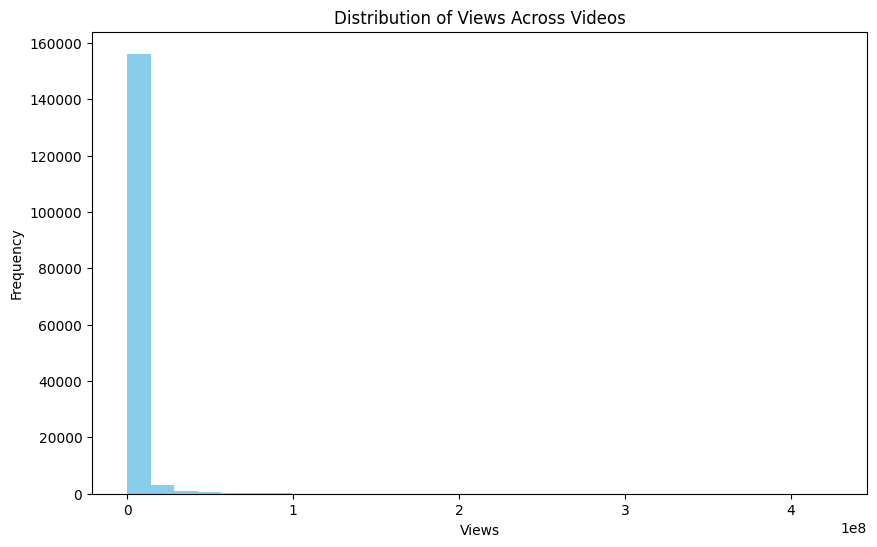

In [136]:
# Views Distribution
plt.figure(figsize=(10, 6))
plt.hist(youtube['Views'], bins=30, color='skyblue')
plt.title('Distribution of Views Across Videos')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

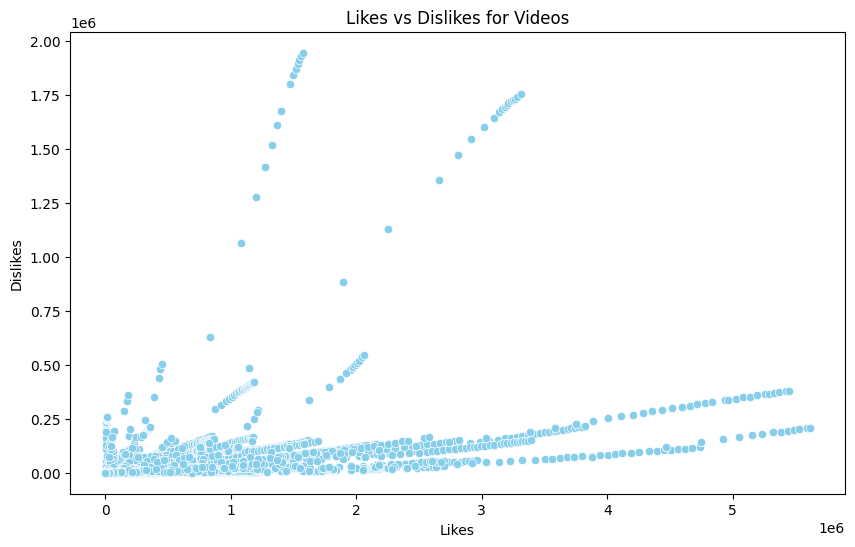

In [138]:
# Likes vs. Dislikes Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Dislikes', data=youtube, color='skyblue')
plt.title('Likes vs Dislikes for Videos')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()

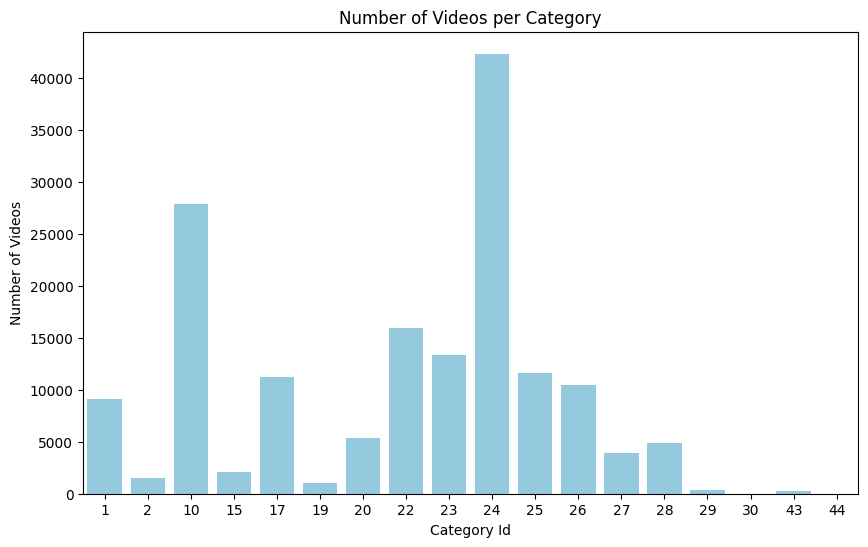

In [140]:
# Category-wise Video Count Bar Chart
category_counts = youtube['Category_Id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')
plt.title('Number of Videos per Category')
plt.xlabel('Category Id')
plt.ylabel('Number of Videos')
plt.show()

# Advanced Data Manipulation
Identify Trending Channels: A channel is considered "trending" if it has more than 3 videos that have become trending in a single week. Identify such channels.

In [142]:
youtube_trending_week = youtube['Publish_Date'].dt.isocalendar().week

videos_per_week_per_channel = youtube.groupby(['Channel_Title', youtube_trending_week]).size()

trending_channels = videos_per_week_per_channel[videos_per_week_per_channel > 3].reset_index()['Channel_Title'].unique()

trending_channels

array(['#AndresSTyle', '#Mind Warehouse',
       '- æ¬¢è¿Žè®¢é˜… -æµ™æ±Ÿå\x8d«è§†ã€\x90å¥”è·‘å\x90§ã€‘å®˜æ–¹é¢‘é\x81“',
       ..., 'ì˜\x81êµ\xadë‚¨ìž\x90 Korean Englishman',
       'ì—¬ìž\x90ì¹œêµ¬ GFRIEND OFFICIAL',
       'íŠ¹ì\x9d´í•œë\x8f™ë¬¼ì±„ë„\x90'], dtype=object)